In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

### Q1. Delivery_time -> Predict delivery time using sorting time 

In [2]:
delivery=pd.read_csv('delivery_time.csv')
delivery

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [3]:
delivery=delivery.rename(columns={'Delivery Time': 'deliverytime','Sorting Time': 'sortingtime'})
delivery

,deliverytime,sortingtime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
delivery.corr()

,deliverytime,sortingtime
deliverytime,1.000000,0.825997
sortingtime,0.825997,1.000000


Text(0, 0.5, 'Sorting Time')

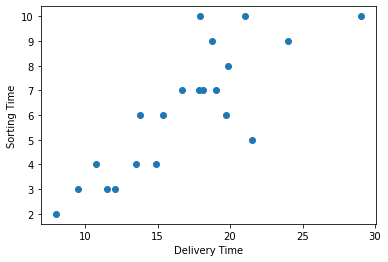

In [5]:
plt.scatter(x=delivery.deliverytime,y=delivery.sortingtime)
plt.xlabel('Delivery Time')
plt.ylabel('Sorting Time')

{'whiskers': [<matplotlib.lines.Line2D at 0x26a69894a00>,
 'caps': [<matplotlib.lines.Line2D at 0x26a6989c040>,
 'boxes': [<matplotlib.lines.Line2D at 0x26a698945e0>],
 'medians': [<matplotlib.lines.Line2D at 0x26a6989c760>],
 'fliers': [<matplotlib.lines.Line2D at 0x26a6989caf0>],
 'means': []}

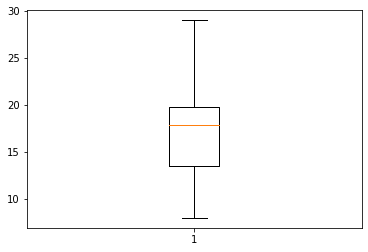

In [6]:
plt.boxplot(delivery.deliverytime)

C:\Users\Rahul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='deliverytime', ylabel='Density'>

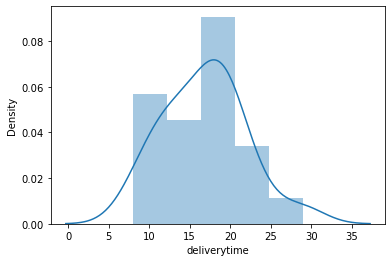

In [7]:
sns.distplot(delivery.deliverytime)

In [8]:
mod2=smf.ols('deliverytime~sortingtime',data=delivery).fit()

In [9]:
mod2.params

Intercept      6.582734
sortingtime    1.649020
dtype: float64

In [10]:
mod2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           deliverytime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sun, 10 Apr 2022   Prob (F-statistic):           3.98e-06
Time:                        12:57:00   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.5827      1.722      3.823      0.001       2.979      10.186
sortingtime     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
mod2.conf_int(0.05)

,0,1
Intercept,2.979134,10.186334
sortingtime,1.108673,2.189367


In [12]:
mod3=smf.ols('deliverytime~np.log(sortingtime)',data=delivery).fit()

In [13]:
mod3.params

Intercept              1.159684
np.log(sortingtime)    9.043413
dtype: float64

In [14]:
mod3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           deliverytime   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Sun, 10 Apr 2022   Prob (F-statistic):           2.64e-06
Time:                        12:57:00   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(sortingtime)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
mod3.conf_int(0.05)

,0,1
Intercept,-3.97778,6.297147
np.log(sortingtime),6.16977,11.917057


In [16]:
p2=mod2.predict(delivery)

In [17]:
p3=mod3.predict(delivery)

Text(0, 0.5, 'Delivery Time')

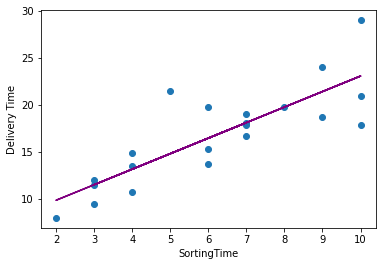

In [18]:
plt.scatter(x=delivery.sortingtime,y=delivery.deliverytime)
plt.plot(delivery.sortingtime,p2,color='purple')
plt.xlabel('SortingTime')
plt.ylabel('Delivery Time')

Text(0, 0.5, 'Delivery time')

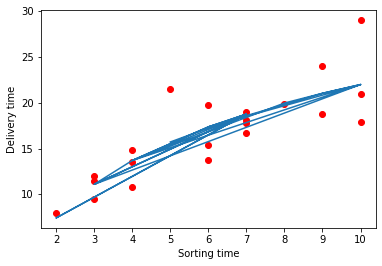

In [19]:
plt.scatter(x=delivery.sortingtime,y=delivery.deliverytime , color='red')
plt.plot(delivery.sortingtime,p3)
plt.xlabel("Sorting time")
plt.ylabel("Delivery time")

### Q2. Salary_hike -> Build a prediction model for Salary_hike

In [20]:
salary=pd.read_csv('Salary_Data.csv')
salary

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [21]:
salary=salary.rename(columns={'YearsExperience':'y_e'})
salary

,y_e,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [22]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y_e     30 non-null     float64
 1   Salary  30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


C:\Users\Rahul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='y_e', ylabel='Density'>

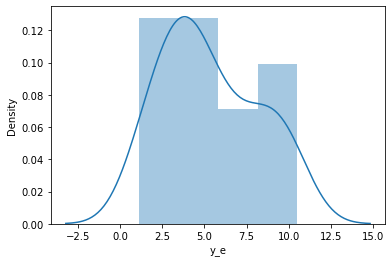

In [23]:
sns.distplot(salary.y_e)

C:\Users\Rahul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

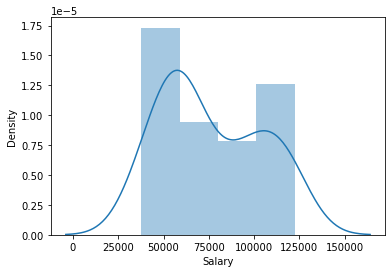

In [24]:
sns.distplot(salary.Salary)

In [25]:
#correlation
salary.corr()

,y_e,Salary
y_e,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:xlabel='y_e', ylabel='Salary'>

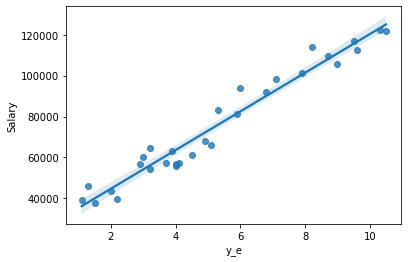

In [26]:
sns.regplot(x=salary.y_e,y=salary.Salary)

In [27]:
#Building Model
mod=smf.ols('Salary~y_e',data=salary).fit()

In [28]:
#Coefficient Parameters
mod.params

Intercept    25792.200199
y_e           9449.962321
dtype: float64

In [29]:
mod.tvalues

Intercept    11.346940
y_e          24.950094
dtype: float64

In [30]:
mod.pvalues

Intercept    5.511950e-12
y_e          1.143068e-20
dtype: float64

In [31]:
mod.rsquared

0.9569566641435086

In [32]:
mod.rsquared_adj

0.9554194021486339

In [33]:
pred=mod.predict(salary)
pred

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

In [38]:
# Manual prediction for say 3 Years Experience
Salary = (25792.200199) + (9449.962321)*(3)
Salary

54142.087162

In [39]:
# Automatic Prediction for say 3 & 5 Years Experience 
new_data=pd.Series([3,5])
new_data

0    3
1    5
dtype: int64

In [42]:
data_pred=pd.DataFrame(new_data,columns=['y_e'])
data_pred

,y_e
0,3
1,5


In [43]:
mod.predict(data_pred)

0    54142.087163
1    73042.011806
dtype: float64